In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# network size N
N = 5000

# number of edges
M = N*30

## initialize time
T = 0
## choose Tmax
Tmax = 1000


In [6]:
def find_extinction_time(b):

    ## random edge matrix
    E = np.random.randint(0,N,size=2*M).reshape((N*30, 2))

    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))

    ## start out with all infectious individuals
    X = np.ones(N, dtype = int)

    ## initialize number infected (all infected)
    I = N

    ## initialize list of infected people for all timesteps
    infected = np.zeros(n)

    # run simulation
    for t in range(n):

        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            I -= X[i]

            X[i] = 0

        else:

            i,j = E[np.random.randint(M)]

            I += X[i] ^ X[j]

            X[i] = X[j] = (X[i] or X[j])
    
        infected[t] = I

        ## if zero infected people, break simulation, truncate infected array
        if I == 0:

            infected = infected[:t]

            break

    ## return extinction time, if there is no extinction time, the time returned will be Tmax
    return times[len(infected)- 1]

def extinction_time_simulation(b_array):

    extinction_times = np.zeros(len(b_array))

    for i, b in zip(np.arange(0, len(b_array), dtype = int), b_array):

        extinction = 0

        if round(find_extinction_time(b)) == Tmax:
            
            extinction_times[i] = Tmax
        
        else:
        
            for t in range(20):

                extinction += find_extinction_time(b)

            extinction_times[i] = extinction / 20
        
        print(extinction_times[i])
    
    return extinction_times




In [4]:
b_array1 = [1/100, 1/80, 1/60]
results1 = extinction_time_simulation(b_array1)
print(results1)



18.53729564247896
24.404918980613484
120.44700533931113
[ 18.53729564  24.40491898 120.44700534]


In [7]:
b_array2 = [1/40, 1/20, 1/10]
results2 = extinction_time_simulation(b_array2)
print(results2)


1000.0
1000.0
1000.0
[1000. 1000. 1000.]


All infection rates beyond the ones tested in b_array2 will also take Tmax amount of time. Rather, focus on the interval between 1/100 and 1/40, as well as below 1/100 as well for future b_arrayi. 

In [8]:
b_array3 = [1/90, 1/70, 1/50]
results3 = extinction_time_simulation(b_array3)
print(results3)


18.90220437011902
37.39292888526372
1000.0
[  18.90220437   37.39292889 1000.        ]


In [9]:
b_array4 = [1/1000, 1/500, 1/250]
results4 = extinction_time_simulation(b_array4)
print(results4)


9.000728205252056
10.48735275861974
11.909111439269589
[ 9.00072821 10.48735276 11.90911144]


In [10]:
b_array5 = [1/52, 1/55, 1/58]
results5 = extinction_time_simulation(b_array5)
print(results5)


1000.0
1000.0
571.9372740055167
[1000.         1000.          571.93727401]


In [11]:
b_array6 = [1/59]
results6 = extinction_time_simulation(b_array6)
print(results6)


1000.0
[1000.]


In [30]:
b_array = [1/100, 1/80, 1/60, 1/40, 1/20, 1/10, 1/90, 1/70, 1/50, 1/1000, 1/500, 1/250, 1/52, 1/55, 1/58, 1/59]
print(b_array)

extinction_times = list(np.concatenate([results1, results2, results3, results4, results5, results6], axis=0))
print(extinction_times)
print(len(extinction_times))


[0.01, 0.0125, 0.016666666666666666, 0.025, 0.05, 0.1, 0.011111111111111112, 0.014285714285714285, 0.02, 0.001, 0.002, 0.004, 0.019230769230769232, 0.01818181818181818, 0.017241379310344827, 0.01694915254237288]
[18.53729564247896, 24.404918980613484, 120.44700533931113, 1000.0, 1000.0, 1000.0, 18.90220437011902, 37.39292888526372, 1000.0, 9.000728205252056, 10.48735275861974, 11.909111439269589, 1000.0, 1000.0, 571.9372740055167, 1000.0]
16


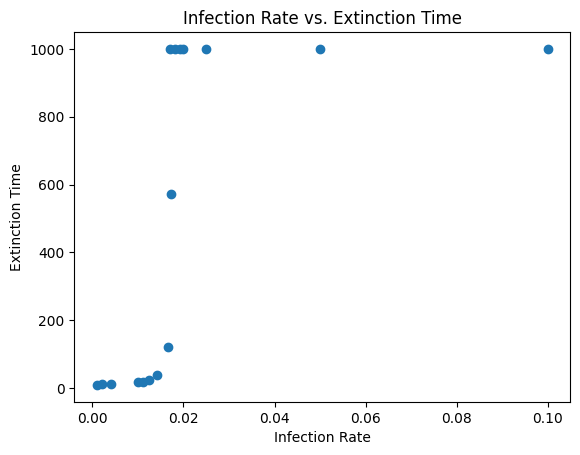

In [32]:
import matplotlib.pyplot as plt
plt.scatter(b_array, extinction_times)
plt.title('Infection Rate vs. Extinction Time')
plt.ylabel('Extinction Time')
plt.xlabel('Infection Rate')
plt.show()
